In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras

from keras.layers import Convolution2D, Flatten, Dense, MaxPool2D, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# Data loading

ds = pd.read_csv('./train.csv')
ds.shape
data = ds.values

In [3]:
X = data[:, 1:]/255.0
y = np_utils.to_categorical(data[:, 0])

print X.shape, y.shape

(42000, 784) (42000, 10)


In [4]:
split = int(0.8 * X.shape[0])

X_train = X[:split].reshape((-1, 28, 28, 1))
X_test = X[split:].reshape((-1, 28, 28, 1))

y_train = y[:split]
y_test = y[split:]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(33600, 28, 28, 1) (8400, 28, 28, 1)
(33600, 10) (8400, 10)


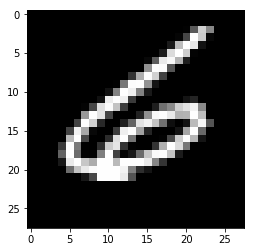

In [5]:
n_img = 21

plt.imshow(X_train[n_img].reshape((28, 28)), cmap='gray')
plt.show()

In [6]:
# Build the model

model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))

model.add(Convolution2D(16, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(8, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 8)         1160      
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 8)         0         
__________

In [7]:
hist = model.fit(X_train, y_train,
                epochs=10,
                shuffle=True,
                batch_size=100,
                validation_data=(X_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 122s - loss: 0.7947 - acc: 0.7315 - val_loss: 0.1801 - val_acc: 0.9493
Epoch 2/10
33600/33600 [==============================] - 6s - loss: 0.2604 - acc: 0.9191 - val_loss: 0.1266 - val_acc: 0.9614
Epoch 3/10
33600/33600 [==============================] - 6s - loss: 0.1957 - acc: 0.9390 - val_loss: 0.0946 - val_acc: 0.9699
Epoch 4/10
33600/33600 [==============================] - 5s - loss: 0.1613 - acc: 0.9511 - val_loss: 0.0796 - val_acc: 0.9760
Epoch 5/10
33600/33600 [==============================] - 5s - loss: 0.1511 - acc: 0.9532 - val_loss: 0.0706 - val_acc: 0.9767
Epoch 6/10
33600/33600 [==============================] - 5s - loss: 0.1339 - acc: 0.9589 - val_loss: 0.0679 - val_acc: 0.9800
Epoch 7/10
33600/33600 [==============================] - 5s - loss: 0.1263 - acc: 0.9611 - val_loss: 0.0633 - val_acc: 0.9799
Epoch 8/10
33600/33600 [==============================] - 5s

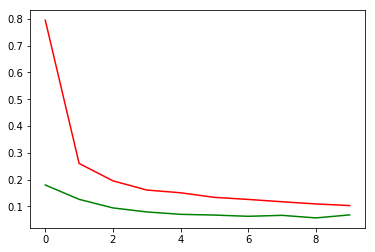

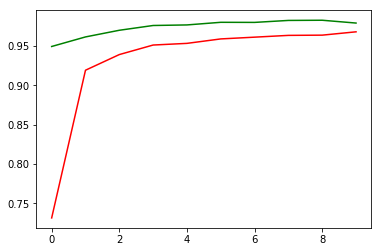

In [8]:
hdata = hist.history

plt.figure(0)
plt.plot(hdata['loss'], 'r')
plt.plot(hdata['val_loss'], 'g')

plt.figure(1)
plt.plot(hdata['acc'], 'r')
plt.plot(hdata['val_acc'], 'g')

In [9]:
df=pd.read_csv("./test.csv")
df.shape

(28000, 784)

In [10]:
test=df.values

In [11]:
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
soln = model.predict_classes(test.reshape((-1, 28, 28, 1)))

27744/28000 [============================>.] - ETA: 0s

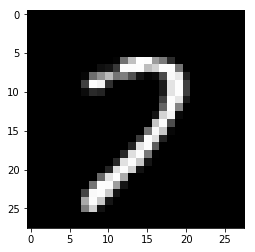

7


In [23]:
n_img = np.random.choice(100)

plt.imshow(test[n_img].reshape((28, 28)), cmap='gray')
plt.show()

print soln[n_img]